***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual**

***Problem 14.2***


This problem is based on the paper by Heide et al. (2010) *Seasonal optimal mix of wind and solar power in a future, highly renewable Europe*, Renewable Energy 35 https://doi.org/10.1016/j.renene.2010.03.012

**a) Assume that the installed capacities for wind and solar are those required to produce, on average, 50% of the annual electricity demand with every technology**

The mismatch is define as the difference between the renewable generation and electricity load.

$\Delta = W + S - L = C_S · CF_S (1+sin (\frac{2\pi}{24}t) + C_W · CF_W (1+sin (\frac{2\pi}{168}t)-L$ 

The capacity factors for solar and wind are $CF_S$=0.15 and $CF_W$=0.25. The installed capacities for solar and wind are $C_S$=3.33 GW, $C_W$=2GW

We will use the packages [numpy](https://numpy.org/) to operate with arrays and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [1]:
import numpy as np
import matplotlib.pyplot as  plt

In [3]:
Delta = np.array([3.33*0.15*(1-np.sin(2*np.pi*t/24))+ 2*0.25*(1-np.sin(2*np.pi*t/168.4423))-1 for t in np.arange(0,8759)])

We can plot the mismatch for the first week of the year.

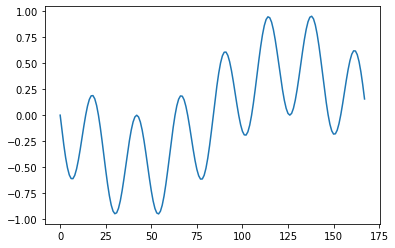

In [4]:
plt.plot(Delta[0:168])

The average mismatch throughout the year is zero, i.e., on average renewable generation equals demand.

In [5]:
np.mean(Delta)

-0.0005147592629695106

The total backup energy can be calculated as the sum of the negative mismatch.

In [6]:
np.sum(Delta[Delta<0])

-1776.4192547803914

The system will require 1,776GWh of backup energy.

The capacity for backup generation can be calculated as the maximum of the negative mismatch values. 

In [7]:
np.max(np.abs(Delta[Delta<0]))

0.999999034824324

The system will require 0.99GW of backup capacity.

The curtailed energy can be calculated as the sum of the positive mismatch.

In [8]:
np.sum(Delta[Delta>0])

1771.9104783960415

Required backup energy and curtailed energy are equal in this system.

**b) Assume $\gamma$=1. Calculate and plot the total backup energy $E_B$, backup capacity $C_B$, and curtailed energy $E_C$, for $\alpha$ values ranging from 0 to 1.**

In [9]:
L = 1
CF_W = 0.25
CF_S = 0.15
E_B_array = []
C_B_array = []
E_C_array = []
alphas = np.arange(0,1.1,0.1)
for alpha in alphas:
    C_W = alpha*L/CF_W
    C_S = (1-alpha)*L/CF_S
    Delta = np.array([C_S*CF_S*(1-np.sin(2*np.pi*t/24))+ C_W*CF_W*(1-np.sin(2*np.pi*t/168.4423))-1 for t in np.arange(0,8759)])
    E_B = np.sum(Delta[Delta<0])
    C_B = np.max(np.abs(Delta[Delta<0]))
    E_C = np.sum(Delta[Delta>0])
    E_B_array.append(E_B)
    C_B_array.append(C_B)
    E_C_array.append(E_C)

The backup energy is minimized when $\alpha$=0.5

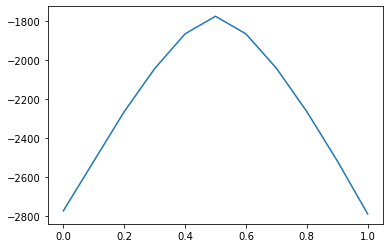

In [10]:
plt.plot(alphas,E_B_array)

The backup capacity is minimized when $\alpha$=0.9

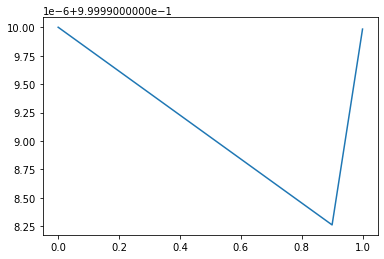

In [11]:
plt.plot(alphas,C_B_array)

The curtailed energy is minimized when $\alpha$=0.5

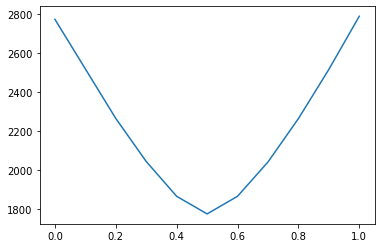

In [12]:
plt.plot(alphas,E_C_array)

**c) Calculate and plot the total backup energy $E_B$, backup capacity $C_B$, and curtailed energy $E_C$, for $\alpha$ values ranging from 0 to 1 and $\gamma$ values ranging from 0 to 1.**

In [13]:
CF_W = 0.25
CF_S = 0.15
E_B_matrix = []
C_B_matrix = []
E_C_matrix = []
gammas = np.arange(0,1.1,0.1)
for gamma in gammas:
    E_B_array =[]
    C_B_array =[]
    E_C_array =[]
    for alpha in alphas:
        C_W = alpha*gamma*L/CF_W
        C_S = (1-alpha)*gamma*L/CF_S
        Delta = np.array([C_S*CF_S*(1-np.sin(2*np.pi*t/24))+ C_W*CF_W*(1-np.sin(2*np.pi*t/168.4423))-1 for t in np.arange(0,8759)])
        E_B = np.sum(Delta[Delta<0])
        C_B = np.max(np.abs(Delta[Delta<0]))
        E_C = np.sum(Delta[Delta>0])
        E_B_array.append(E_B)
        C_B_array.append(C_B)
        E_C_array.append(E_C)

    E_B_matrix.append(E_B_array)
    C_B_matrix.append(C_B_array)
    E_C_matrix.append(E_C_array)

The required backup energy is minimized for $\gamma$=1 and $\alpha$=0.5

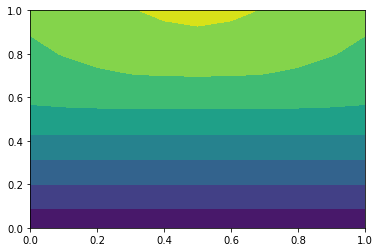

In [14]:
plt.contourf(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), E_B_matrix)


The required backup capacity is minimized for $\gamma$=1 and $\alpha$=0.9.

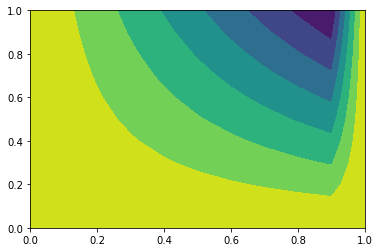

In [15]:
plt.contourf(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), C_B_matrix)

The curtialed energy is minimized for $\gamma$=1 and $\alpha$=0.5

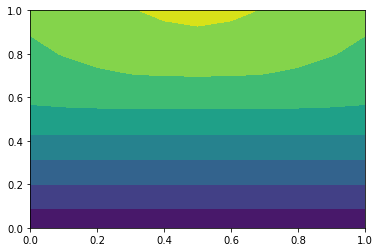

In [16]:
plt.contourf(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), E_B_matrix)